# The Scikit-learn Python Library

[Official Website](https://scikit-learn.org/stable/index.html)

# DecisionTreeRegressor - Decision Tree Algorithm
## Forest Fire Dataset
### Goal is to predict the burned area of forest fires
https://scikit-learn.org/stable/modules/tree.html#tree
***



# End of DecisionTreeRegressor - Decision Tree Algorithm

***

***

***

# K-Means - Clustering Algorithm
## Household Power Consumption Dataset
### Goal is to predict a short term forecast on electricity consumption 
https://scikit-learn.org/stable/modules/clustering.html#k-means

***



# End of K-Means - Clustering Algorithm

***

***

***

# LinearSVC - Support Vector Machine Algorithm
## Wine Dataset
### Goal is to use chemical analysis to determine the origin of wines
https://scikit-learn.org/stable/modules/svm.html#svm-classification
***

## Setup


In [2]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

In [99]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('seaborn')

<br>

### The Wine Dataset

***

In [48]:
# Loading the wine data set
df = pd.read_csv("https://raw.githubusercontent.com/Pasha-Akito/Emerging-Technologies-Assessment/main/wine.csv", header = None);

In [49]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [50]:
# Adding headers to the dataset
df.columns = [  'class','alcohol','malic acid','ash','alcalinity of ash','magnesium','total phenols',
              'flavanoids','nonflavanoid phenols','proanthocyanins','colour intensity','hue','od280/od315','proline']

In [51]:
df

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [52]:
# Summary statistics
df.describe()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,od280/od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [53]:
# Checking for Missing Values
df.isnull().sum()

class                   0
alcohol                 0
malic acid              0
ash                     0
alcalinity of ash       0
magnesium               0
total phenols           0
flavanoids              0
nonflavanoid phenols    0
proanthocyanins         0
colour intensity        0
hue                     0
od280/od315             0
proline                 0
dtype: int64

<br>

### Visualisation

***

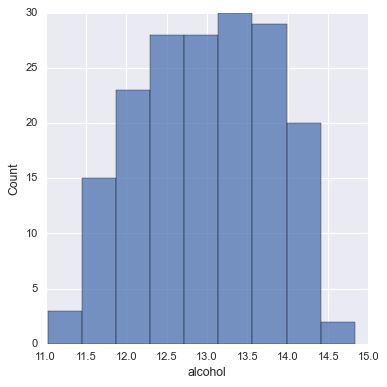

In [100]:
# Distribution of alcohol 
sns.displot(df['alcohol'],kde=0)

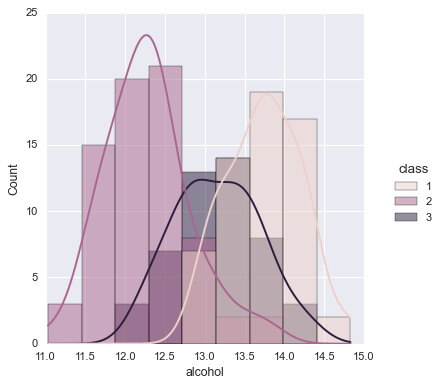

In [101]:
# Distribution of alcohol by class
sns.displot(df, x = "alcohol", hue = "class", kde = 1)

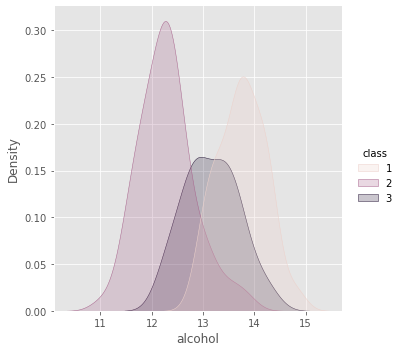

In [87]:
# Distribution of alcohol by class
sns.displot(df, x = "alcohol", hue = "class", kind = "kde", fill = True)



# End of LinearSVC - Support Vector Machine Algorithm

***
